<a href="https://colab.research.google.com/github/axefx/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Axel_Corro_LS_DS13_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# 1. function

In [0]:
# TODO - code!
p_pos_user = 1
p_user = 1/1000
p_pos_non_user = 0.08
p_non_user = 1 - p_user

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  p_non_user = 1 - prob_drunk_prior
  numerator = 1 * prob_drunk_prior
  denominator = (1)*(prob_drunk_prior) + (false_positive_rate) * (p_non_user)
  return (numerator / denominator)

In [49]:
prob_drunk_given_positive(1/1000, 0.08)

0.012357884330202669

In [50]:
prior = 1/1000
p_drunk = []
for i in range(1,11):
  prior = prob_drunk_given_positive(prior,0.08)
  p_drunk.append(prior)

p_drunk

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192]

- probability that a person is drunk after one positive breathalyzer test: **0.012357884330202669**

- probability that a person is drunk after two positive breathalyzer tests: **0.13525210993291495**

- positive breathalyzer tests needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit: **3rd test = 0.6615996951348605**

# 2. Exploring scipy.stats.bayes_mvs

In [0]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-20 03:48:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-02-20 03:48:11 (137 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
help(stats.bayes_mvs)

In [54]:
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [55]:
df.shape

(435, 17)

In [56]:
df = df.replace({'y': 1,'n': 0,'?':np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the ****sample**** standard deviation
  s = np.std(sample, ddof=1)
  # Standard Error
  stderr = s / np.sqrt(n)
  # University of Iowa page:
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  # What is the t-statistic that corresponds to my degrees of freedom, 
  # and a specific probability cutoff
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [58]:
df.dtypes

party                    object
handicapped-infants     float64
water-project           float64
budget                  float64
physician-fee-freeze    float64
el-salvador-aid         float64
religious-groups        float64
anti-satellite-ban      float64
aid-to-contras          float64
mx-missile              float64
immigration             float64
synfuels                float64
education               float64
right-to-sue            float64
crime                   float64
duty-free               float64
south-africa            float64
dtype: object

In [69]:
budget = df[['party','budget']].dropna()
budget

,party,budget
0,republican,0.0
1,republican,0.0
2,democrat,1.0
3,democrat,1.0
4,democrat,1.0
...,...,...
430,republican,1.0
431,democrat,1.0
432,republican,0.0
433,republican,0.0


In [70]:
budget['budget'].value_counts(dropna=False)

1.0    253
0.0    171
Name: budget, dtype: int64

In [92]:
budget['budget'].mean()

0.5966981132075472

In [0]:
CI1 = confidence_interval(budget['budget'])

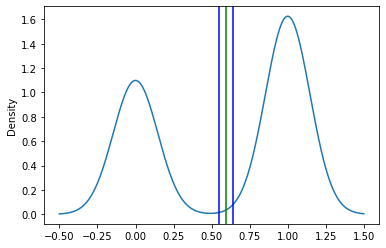

In [99]:
budget['budget'].plot.density()
plt.axvline(CI1[0], color='blue')
plt.axvline(CI1[1], color='green')
plt.axvline(CI1[2], color='blue')
plt.show()

# 3. own words definition

Frequentist statistics deal with and rely more on samplin and testing those samples.

Bayesian statistics uses formulas to gather new information to come up with a conclusion.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!